<a href="https://colab.research.google.com/github/jere1882/DL_IADS22/blob/main/RNN_IMDB_review_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMDB Review Sentiment Analysis using RNNs
In this notebook I'm going to use simple recurrent neural networks and LSTMs to classify IMDB reviews as positive or negative

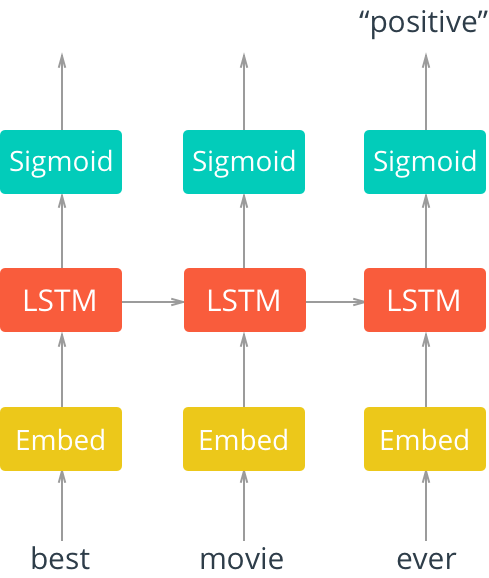

## Retrieve and preprocess the data


In [7]:
#Import everything first
import keras
from keras.datasets import imdb
#imdb dataset has reviews of movies + a label that is positive or negative
from keras.preprocessing import sequence
from keras.utils import pad_sequences
from keras.layers import Dense
from keras.layers import Embedding, LSTM, SimpleRNN
from keras.models import Sequential
from keras.layers import Dropout
from keras import layers
import matplotlib.pyplot as plt

In [8]:
max_features = 20000 # This means that from each review, we will filter or
                     #  nullify words that are not in the  top max_features frequent
                     # words.
maxlen = 1500  # this is the max number of words we will allow on each sequence. 
               # we'll only keep the fist maxlen words
batch_size = 32
print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

# Each sequence in this dataset tokenized as a vector of integers. meaning that each word 
# is encoded as an integer: its position in the frequency ranking on imdb

Loading data...


In [9]:
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

25000 train sequences
25000 test sequences


In [10]:
input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)

# pad sequence converts the encoded reviews as retrieved from the imdb into a
# 2D numpy array of shape  (num_sequences x maxlen). 
# each sequence is a trimmed to be no longer than maxlen
# each row is a sequence sorted by timestamp

In [11]:

print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

input_train shape: (25000, 1500)
input_test shape: (25000, 1500)


## Training the model with Embedding and SimpleRNN layers

We'll use an Embedding layer to map each word to a low-dimensionality, dense vector.

The Embedding layer actually learns a "lookup table" that has CORPUS_SIZE rows, where row i is the embedded representation of the ith word in the corpus.

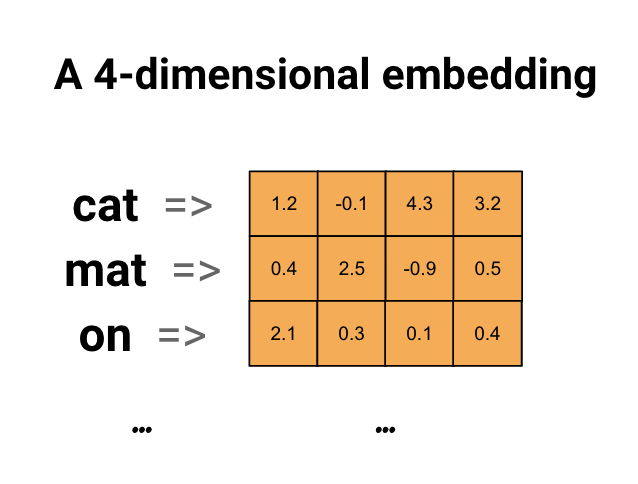

Then we'll use a simple RNN layer:

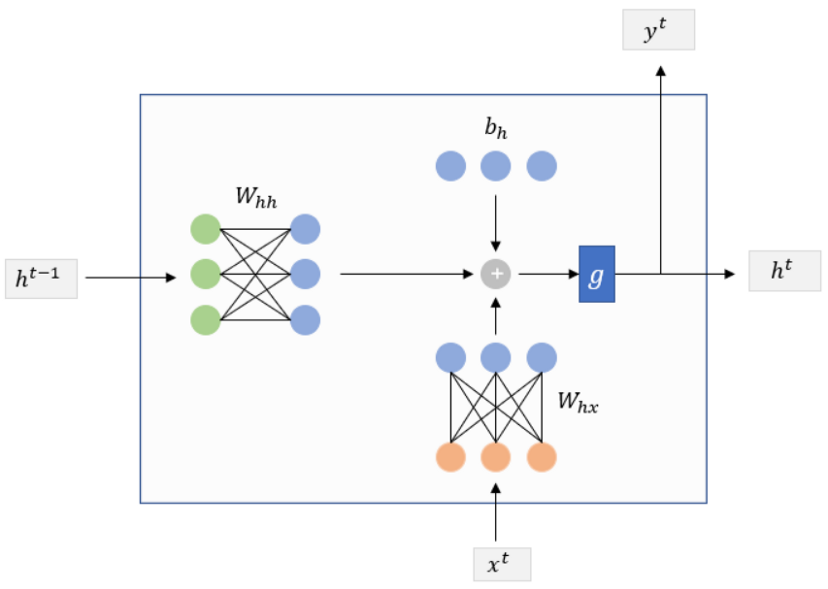

In [12]:
CORPUS_SIZE = max_features
EMBEDDING_SIZE = 32
NUM_HIDDEN_UNITS = 32
model = Sequential()
model.add(Embedding(CORPUS_SIZE, EMBEDDING_SIZE))
model.add(SimpleRNN(NUM_HIDDEN_UNITS))
model.add(layers.Dropout(0.5)) # Dropout
model.add(Dense(1, activation='sigmoid'))
model.summary()
model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy', 
              metrics=['acc'])

history = model.fit(input_train, y_train, 
                    epochs=30,
                    batch_size=128,
                    validation_split=0.2)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          640000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 642,113
Trainable params: 642,113
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30


2022-09-26 05:29:27.999925: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-09-26 05:29:27.999943: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-09-26 05:29:27.999960: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (jere-Precision-7560): /proc/driver/nvidia/version does not exist
2022-09-26 05:29:28.000192: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


157/157 [==============================] - 30s 185ms/step - loss: 0.6629 - acc: 0.5976 - val_loss: 0.5392 - val_acc: 0.7840
Epoch 2/30
157/157 [==============================] - 27s 175ms/step - loss: 0.4435 - acc: 0.8176 - val_loss: 0.5360 - val_acc: 0.7426
Epoch 3/30
157/157 [==============================] - 29s 187ms/step - loss: 0.3332 - acc: 0.8722 - val_loss: 0.5133 - val_acc: 0.7704
Epoch 4/30
157/157 [==============================] - 29s 184ms/step - loss: 0.2602 - acc: 0.9068 - val_loss: 0.3587 - val_acc: 0.8612
Epoch 5/30
157/157 [==============================] - 29s 184ms/step - loss: 0.2027 - acc: 0.9281 - val_loss: 0.3575 - val_acc: 0.8662
Epoch 6/30
157/157 [==============================] - 29s 186ms/step - loss: 0.1575 - acc: 0.9446 - val_loss: 0.3899 - val_acc: 0.8582
Epoch 7/30
157/157 [==============================] - 29s 184ms/step - loss: 0.1149 - acc: 0.9629 - val_loss: 0.4398 - val_acc: 0.8634
Epoch 8/30
157/157 [==============================] - 29s 188ms/st

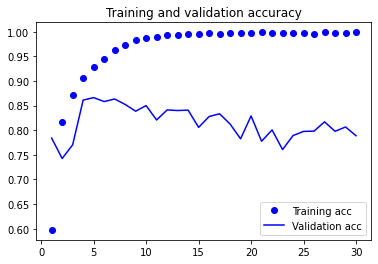

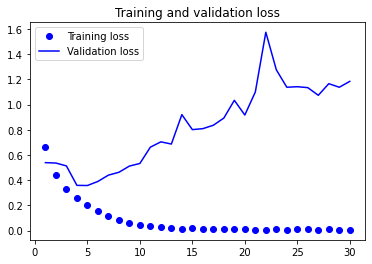

In [13]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Notice that QW you increase the # of epochs, the model starts overfitting
# and accuracy goes down

In [14]:
test_loss, test_acc = model.evaluate(input_test, y_test)

782/782 [==============================] - 42s 54ms/step - loss: 1.1736 - acc: 0.7825


## Training the model with Embedding and LSTM layers

LSTMs are a more complex type of RNN that have memory cells, useful to "remember" infromation for longer
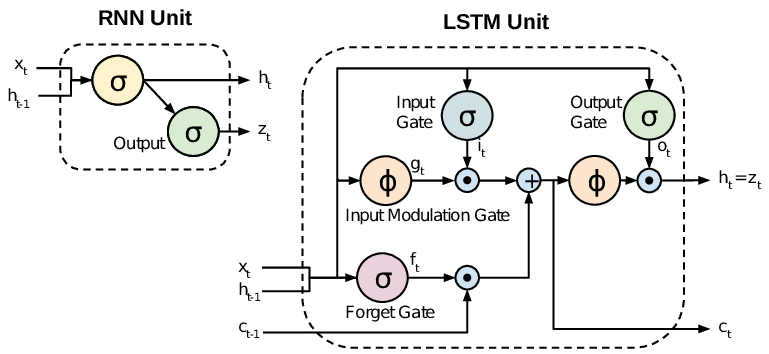

In [15]:
model = Sequential()
model.add(Embedding(CORPUS_SIZE, EMBEDDING_SIZE))
model.add(LSTM(NUM_HIDDEN_UNITS))

model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=30,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/30
157/157 [==============================] - 47s 296ms/step - loss: 0.4986 - acc: 0.7666 - val_loss: 0.3576 - val_acc: 0.8632
Epoch 2/30
157/157 [==============================] - 48s 307ms/step - loss: 0.2789 - acc: 0.8933 - val_loss: 0.2779 - val_acc: 0.8902
Epoch 3/30
157/157 [==============================] - 48s 306ms/step - loss: 0.2202 - acc: 0.9201 - val_loss: 0.3044 - val_acc: 0.8902
Epoch 4/30
157/157 [==============================] - 48s 306ms/step - loss: 0.1701 - acc: 0.9394 - val_loss: 0.3448 - val_acc: 0.8650
Epoch 5/30
157/157 [==============================] - 48s 307ms/step - loss: 0.1353 - acc: 0.9526 - val_loss: 0.4858 - val_acc: 0.8256
Epoch 6/30
157/157 [==============================] - 48s 307ms/step - loss: 0.1199 - acc: 0.9602 - val_loss: 0.4069 - val_acc: 0.8660
Epoch 7/30
157/157 [==============================] - 48s 306ms/step - loss: 0.1052 - acc: 0.9636 - val_loss: 0.3784 - val_acc: 0.8730
Epoch 8/30
157/157 [==============================] - 4

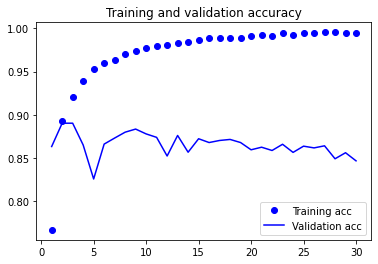

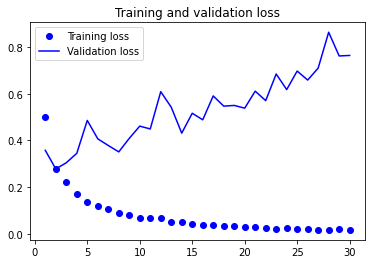

In [16]:

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [17]:
test_loss, test_acc = model.evaluate(input_test, y_test)

782/782 [==============================] - 60s 76ms/step - loss: 0.8409 - acc: 0.8299


Conclusion so far: LSTMs achieved 84% accuracy, a significant improvement over 77% accuracy achieved by simple RNNs.

## Bonus: Exploring the effect of the hyperparameters
Out of coursiosity, let's see the test error as a function of the embedding size and the number of hidden units of the LSTM


In [18]:
from sklearn.model_selection import ParameterGrid

param_grid = [
  {'embedding_size': [1, 10, 20, 30], 'num_hidden_units': [1, 10, 20, 30]}
 ]

results = {}

for g in ParameterGrid(param_grid):
  embedding_size = g['embedding_size']
  num_hidden_units = g['num_hidden_units']
  results[(embedding_size,num_hidden_units)] = []

# Repeat everything 2 times to get smoother results
for i in range(1,4):
  for g in ParameterGrid(param_grid):
    embedding_size = g['embedding_size']
    num_hidden_units = g['num_hidden_units']
    print("Training ",embedding_size, num_hidden_units)
    model = Sequential()
    model.add(Embedding(max_features, embedding_size))
    model.add(LSTM(num_hidden_units))

    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['acc'])
    history = model.fit(input_train, y_train,
                        epochs=15,
                        batch_size=128,
                        validation_split=0.2,
                        verbose=0)
    test_loss, test_acc = model.evaluate(input_test, y_test)
    results[(embedding_size,num_hidden_units)] = results[(embedding_size,num_hidden_units)] + [test_acc]



Training  1 1
782/782 [==============================] - 47s 60ms/step - loss: 0.3984 - acc: 0.8556
Training  1 10
782/782 [==============================] - 48s 61ms/step - loss: 0.3840 - acc: 0.8727
Training  1 20
782/782 [==============================] - 49s 63ms/step - loss: 0.4047 - acc: 0.8572
Training  1 30
782/782 [==============================] - 52s 67ms/step - loss: 0.4209 - acc: 0.8504
Training  10 1
782/782 [==============================] - 47s 61ms/step - loss: 0.4063 - acc: 0.8363
Training  10 10
782/782 [==============================] - 50s 64ms/step - loss: 0.5675 - acc: 0.8518
Training  10 20
782/782 [==============================] - 37s 48ms/step - loss: 0.8078 - acc: 0.8149
Training  10 30
782/782 [==============================] - 56s 72ms/step - loss: 0.5816 - acc: 0.8525
Training  20 1
782/782 [==============================] - 47s 60ms/step - loss: 0.4170 - acc: 0.8339
Training  20 10
782/782 [==============================] - 53s 68ms/step - loss: 0.6010 -

/tmp/ipykernel_1577886/1205598185.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([1]+label_list)
/tmp/ipykernel_1577886/1205598185.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([1]+label_list)


Text(0, 0.5, 'Number of hidden units')

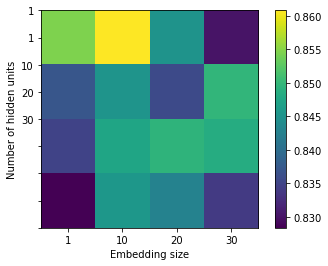

In [19]:
import numpy as np
matrix_size = len(param_grid[0]['embedding_size'])
results_matrix = np.zeros(shape=(matrix_size,matrix_size))

for i in range(0,matrix_size):
  for j in range(0,matrix_size):
    embedding_size = param_grid[0]['embedding_size'][i]
    num_hidden_units = param_grid[0]['num_hidden_units'][j]
    vec = results[(embedding_size,num_hidden_units)]
    results_matrix[i,j] = sum(vec)/len(vec)

fig, ax = plt.subplots(1,1)

label_list = param_grid[0]['embedding_size']

img = ax.imshow(results_matrix)
ax.set_xticklabels([1]+label_list)
ax.set_yticklabels([1]+label_list)
fig.colorbar(img)
plt.xlabel('Embedding size')
plt.ylabel('Number of hidden units')

Surprisingly, a small number of hidden units and even a small embedding is sufficient to achieve very good performance. **This seems to indicate that the actual information used for classifying reviews is very low dimensional.**

# Appendix: About Tokenizers

This is a naive way of encoding text into vectors. Each word is turned into its index in a predefined corpus. (see [docs](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer))

In [20]:
from keras.preprocessing.text import Tokenizer
samples = ['The cat sat on the mat.', 'The dog ate my homework.']
# We create a tokenizer, configured to only take into account the top-1000 most common words
tokenizer = Tokenizer(num_words=1000)

In [21]:
# This builds the word index
tokenizer.fit_on_texts(samples)

# This turns strings into lists of integer indices.
sequences = tokenizer.texts_to_sequences(samples)
sequences

[[1, 2, 3, 4, 1, 5], [1, 6, 7, 8, 9]]

In [22]:
# You could also directly get the one-hot binary representations.
# Note that other vectorization modes than one-hot encoding are supported!
one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary')

one_hot_results

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [23]:
# This is how you can recover the word index that was computed
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 9 unique tokens.


In [24]:
one_hot_results

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])